In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 


In [2]:
train=pd.read_csv('./x_train.csv', header=None )#, na_values='?')
train_y=pd.read_csv('./y_train.csv', header=None)

In [3]:
n=train.columns.values

for i in n:
    for j in n:
        if i!=j:
            train[str(i)+'&'+str(j)]=train[i]*train[j]
            k=train[i]+train[j]
            k[k>0]=1
            train[str(i)+'|'+str(j)]=k
            

In [4]:
import seaborn as sns
train['target']=train_y[0]


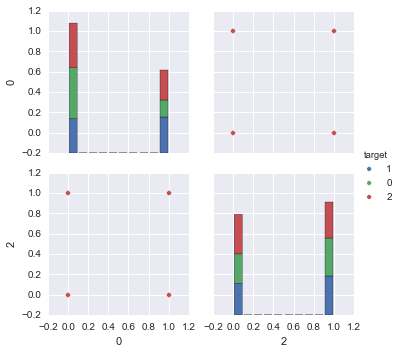

In [134]:
sns.pairplot(train,hue='target',vars=[0,2])

In [5]:
dt=train.copy()

### создадим себе выборки хорошие для тренировок

In [6]:
y=np.hstack(np.array([dt['target'].values.astype(int)]))
print y.shape

n=list(dt.columns.values)
n=n[:n.index('target')]+n[n.index('target')+1:]

x= np.vstack([np.array(dt[n[0]].values)])
for i in n[1:]:
    x=np.append(x, np.vstack([np.array(dt[i].values)]),axis=0)
print x.shape
x=x.T

(210,)
(1770, 210)


In [7]:
x_scaled=x

In [8]:
from sklearn import grid_search
from sklearn.cross_validation import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.naive_bayes import BernoulliNB

## Random Forest

In [143]:
params_rf = {'n_estimators':[200,250,300,500], 'random_state':[1,2] , 'min_samples_leaf':[1,3]}
rf = RandomForestClassifier(n_jobs=2)

In [144]:
rf_gs=grid_search.GridSearchCV(rf,params_rf, scoring='accuracy')

In [145]:
rf_gs.fit(x_scaled,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [200, 250, 300, 500], 'random_state': [1, 2], 'min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [146]:
print rf_gs.best_score_
print rf_gs.best_params_

0.47619047619
{'n_estimators': 200, 'random_state': 2, 'min_samples_leaf': 1}


In [100]:
a=cross_val_score(RandomForestClassifier(n_jobs=2, n_estimators=200, random_state=2, bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, oob_score=False, verbose=0, warm_start=False), x_scaled, y, cv=5, scoring='accuracy')
print np.mean(a)

0.456301218162


In [147]:
rf = RandomForestClassifier(n_jobs=2,n_estimators=200,random_state=2,min_samples_leaf=1)
rf.fit(x_scaled,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [102]:
indexes= np.argsort(rf.feature_importances_)

for i in indexes[::-1]:
    print train.columns.values[i], rf.feature_importances_[i]

18&19 0.00352857663045
28&27 0.00289384532473
27&21 0.00239106148303
20&21 0.00228879397187
12|22 0.00228531817487
14|12 0.0022413547626
27&28 0.00219380254253
26&6 0.00217216068119
12|14 0.00211770182137
0|20 0.00185875299907
12|6 0.00182087252061
16&19 0.00181888550858
3&19 0.00178808862892
14|4 0.00174492263776
6|28 0.00172699263748
20|13 0.0017216402626
12&19 0.00168113834248
14&1 0.00166912281704
1|12 0.00164358892077
17|12 0.00161874672292
1|6 0.0016156668049
0 0.00161223661861
14|15 0.00160975965502
16&28 0.0016058793449
26&13 0.00160357358591
21&19

KeyboardInterrupt: 

## svm

In [44]:
param_svm = dict(gamma=[ 0.0001, 0.001, 0.1, 1, 10], C=[1,4,5,6] )
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, param_svm,scoring='accuracy')

In [45]:
grid.fit(x_scaled,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 4, 5, 6], 'gamma': [0.0001, 0.001, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [46]:
print grid.best_score_
print grid.best_params_

0.47619047619
{'C': 5, 'gamma': 0.1}


In [67]:
print np.mean(cross_val_score(svm.SVC(C = 5, gamma = 0.1, kernel='rbf'), x_scaled, y, cv=5,scoring='accuracy'))

0.441777408638


### knn

In [63]:
params_knn={'n_neighbors': [1,5,10,20,42,43,44,50]}
knn=KNeighborsClassifier()
gs3=grid_search.GridSearchCV(knn, params_knn, scoring='accuracy')

In [64]:
gs3.fit(x_scaled,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [5]}, pre_dispatch='2*n_jobs',
       refit=True, score_func=None, scoring='accuracy', verbose=0)

In [65]:
print gs3.best_score_
print gs3.best_params_

0.404761904762
{'n_neighbors': 5}


In [77]:
print np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=15), x_scaled, y, cv=5,scoring='accuracy'))

0.433648947951


## Формируем тест

In [148]:
test=pd.read_csv('./x_test.csv', header=None)

In [150]:
n=test.columns.values

for i in n:
    for j in n:
        if i!=j:
            test[str(i)+'&'+str(j)]=test[i]*test[j]
            k=test[i]+test[j]
            k[k>0]=1
            test[str(i)+'|'+str(j)]=k
            

In [151]:
dt=test.copy()
n=list(dt.columns.values)

x= np.vstack([np.array(dt[n[0]].values)])
for i in n[1:]:
    x=np.append(x, np.vstack([np.array(dt[i].values)]),axis=0)
print x.shape
x=x.T

(1770, 210)


In [152]:
ans = pd.Series(rf.predict(x))
res=pd.DataFrame()

In [153]:
#res['id']=test[0]
res['y']=ans
res
res.to_csv('ans.txt', index=False, header=None )

##### (n_jobs=2,n_estimators=200,random_state=2,min_samples_leaf=1)
0,429


##### без фичер инжениринга свм 444 гридсерч дал.

In [ ]:
attrib_names = [ str(i) for i in range(0,29) ]

def make_intent(example):
    global attrib_names
    return set([i+':'+str(k) for i, k in zip(attrib_names, example)])



In [ ]:
def read_files():
    
    data_0=[]
    data_1=[]
    data_2=[]
    
    x_test=[]
    y_test=[]

    train=pd.read_csv('./x_train.csv', header=None )#, na_values='?')
    train_y=pd.read_csv('./y_train.csv', header=None)
    train['target']=train_y[0]
    
    dt1=train[train.index < 210. * 4 / 5].copy()
    dt2=train[train.index >= 210. * 4 / 5].copy()
    
    ###_________###
    
    train = np.array(dt1)
    
    test = np.array(dt2)
    ###_________###
    
    
#    train=np.array(train)

    data_0 = [make_intent(a[:-1]) for a in train if a[-1] == 0]
    data_1 = [make_intent(a[:-1]) for a in train if a[-1] == 1]
    data_2 = [make_intent(a[:-1]) for a in train if a[-1] == 2]
   
#    test=pd.read_csv('./x_test.csv', header=None)    
#    test=np.array(test)
#    x_test = [make_intent(a) for a in test]
    x_test = [make_intent(a[:-1]) for a in test]
    y_test = [a[-1] for a in test]
    
    return data_0, data_1, data_2, x_test, y_test

In [ ]:
pos, neg, eq, x_test, y_test = read_files()
print is_in_intent(pos, neg, eq, x_test, y_test)

In [ ]:
def is_in_intent(plus, minus, ravno, x_test, y_test):
    y_pred=[]
    counter=0
    for i in x_test:
        counter+=1
        unkn_set=i
        pos=0
        neg=0
        eq=0

        for j in plus:
            pos_set=j
            res=pos_set & unkn_set
            closure=0
            for k in minus:
                if k.issuperset(res):
                    closure+=1
                    break  
            for k in ravno:
                if k.issuperset(res):
                    closure+=1
                    break
            if closure==0:
                pos+=float(len(res)) / len(pos_set)
        pos=float(pos) / len(plus)   
        
        
        for j in minus:
            neg_set=j
            res=neg_set & unkn_set
            closure=0
            for k in plus:
                if k.issuperset(res):
                    closure+=1
                    break
            for k in ravno:
                if k.issuperset(res):
                    closure+=1
                    break
            if closure==0:
                neg+=float(len(res)) / len(neg_set)
        neg=float(neg) / len(minus) 

        
        for j in ravno:
            neg_set=j
            res=neg_set & unkn_set
            closure=0
            for k in plus:
                if k.issuperset(res):
                    closure+=1
                    break
            for k in minus:
                if k.issuperset(res):
                    closure+=1
                    break
            if closure==0:
                eq+=float(len(res)) / len(neg_set)
        eq=float(eq) / len(minus) 
        

        if (pos <= neg and pos <= eq):
            y_pred.append(0)
        else:
            if (neg <= pos and neg <= eq):
                y_pred.append(1)
            else:
                if (eq <= pos and eq <= neg):
                    y_pred.append(2)
            
            

    y_pred=np.array(y_pred)
    y_test=np.array(y_test)
    
    print y_pred
    print y_test
    
    return print_metris(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def print_metris(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    return acc

In [146]:
import pandas as pd
import numpy as np
from sklearn import ensemble
import xgboost as xgb
from sklearn import ensemble
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation
from time import time
from sklearn import svm


import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.linear_model import LogisticRegression

import xgboost as xgb

from xgboost import XGBModel, XGBClassifier





In [172]:
l=[str(i) for i in range(0,30)] 

In [173]:
train=pd.read_csv('./x_train.csv', header=None, names=l) #, na_values='?')
train_y=pd.read_csv('./y_train.csv', header=None)

n=train.columns.values

for i in n:
    for j in n:
        if i!=j:
            train[str(i)+'111'+str(j)]=train[i]*train[j]
            k=train[i]+train[j]
            k[k>0]=1
            train[str(i)+'000'+str(j)]=k
            

In [174]:
features=train.columns.values
data_train=train.copy()
data_train['y']=train_y[0]

train['y']=train_y[0]

In [195]:
#Определяем кросс-валидацию для стакинга и последующей кросс-валидации итоговой модели. 
cv = cross_validation.StratifiedKFold(data_train['y'], n_folds=3, shuffle=True,
                               random_state=0)


#Определяем классификаторы для стакинга. Здесь я поставил намеренно слабые, чтобы они считались быстрее.
#Имеет смысл поиграть с параметрами и посмотреть, что получится. 

svmP=svm.SVC(C = 5, gamma = 0.1, kernel='rbf',probability=True)

clf_rf = ensemble.RandomForestClassifier(n_estimators = 300, n_jobs=4, 
                                         max_depth = 10, max_features=0.35,
                                         random_state=1, min_samples_leaf=2)

clf_weak_rf = ensemble.RandomForestClassifier(n_estimators = 200, n_jobs=4, 
                                         max_depth = 10, max_features=0.35,
                                         random_state=1, min_samples_leaf=2)

#В этом примере я использовал адабуст на random forest
clf_ada = ensemble.AdaBoostClassifier(base_estimator = svmP, n_estimators=50, learning_rate=0.01, 
                                      random_state=0)

clf_ada1 = ensemble.AdaBoostClassifier(base_estimator = clf_rf, n_estimators=100, learning_rate=0.001, 
                                      random_state=0)





#Определяем оригинальный хгбуст
params = {"objective": 'multi:softprob',
          "eta": 0.04,
          "max_depth": 5,
          "min_child_weight": 7,
          "silent": 1,
          "subsample": 0.4,
          "colsample_bytree": 0.7,
          "seed": 1,
          'lambda':7.0,
          'alpha':0,
          'num_class': nnn,
          'gamma': 0,
          'nthread':4
         }
num_trees=10

nnn=len(train['y'].unique())


svm_preds = pd.DataFrame(index=train.index, columns=['SVM_'+str(i) for i in range(nnn)])
rf_preds = pd.DataFrame(index=train.index, columns=['rf_'+str(i) for i in range(nnn)])
ada_preds = pd.DataFrame(index=train.index, columns=['ada_'+str(i) for i in range(nnn)])
xgbst_preds = pd.DataFrame(index=train.index, columns=['xgbst_'+str(i) for i in range(nnn)])

In [196]:
#Вероятности заполняются на кросс-валидации. Обратите внимание, что для оценки точности логистической регрессии
#используется та же самая кросс-валидация
i = 0
for train_ind, test_ind in cv:
    i+=1
    print 'Fold', i
    train_cv = train.loc[train_ind]
    test_cv = train.loc[test_ind]
    
    print ' Training svm'
    svmP.fit(train_cv[features], train_cv['y']) 
    svm_preds.loc[test_ind] = svmP.predict_proba(test_cv[features])
    print '   Done.'
    
    
    print ' Training RF'
    clf_rf.fit(train_cv[features], train_cv['y']) 
    rf_preds.loc[test_ind] = clf_rf.predict_proba(test_cv[features])
    print '   Done.'
    
    print ' Training AdaBoost'
    clf_ada.fit(train_cv[features], train_cv['y'])
    ada_preds.loc[test_ind] = clf_ada.predict_proba(test_cv[features])
    print '   Done.'

    print ' Training AdaBoost'
    clf_ada1.fit(train_cv[features], train_cv['y'])
    xgbst_preds.loc[test_ind] = clf_ada1.predict_proba(test_cv[features])
    print '   Done.'
    
    
#    print ' Training XGBoost'
#    gbm = xgb.train(params, xgb.DMatrix(train_cv[features], train_cv['y']), num_trees)
#    xgbst_preds.loc[test_ind] = gbm.predict(xgb.DMatrix(test_cv[features])).reshape(test_cv.shape[0], nnn)
#    print '   Done.'
    
    
#Объединяем вероятности в один датафрейм
train1 = pd.concat([ada_preds, rf_preds, xgbst_preds, svm_preds], axis=1)

Fold 1
 Training svm
   Done.
 Training RF
   Done.
 Training AdaBoost
   Done.
 Training AdaBoost
   Done.
Fold 2
 Training svm
   Done.
 Training RF
   Done.
 Training AdaBoost
   Done.
 Training AdaBoost
   Done.
Fold 3
 Training svm
   Done.
 Training RF
   Done.
 Training AdaBoost
   Done.
 Training AdaBoost
   Done.


In [197]:
#Прогтейоняем логистическую регрессию на той же кросс-валидации, которая использовалась для подсчета вероятнос
clf_lr = LogisticRegression(C=30, class_weight=None, 
                            penalty='l2', random_state=0,
                            solver='lbfgs', multi_class = 'ovr')

a = cross_val_score(clf_lr, train1, y=data_train['y'], cv=cv)
print 'Log regr accuracy', np.mean(a), '±', np.std(a)

Log regr accuracy 0.433592861517 ± 0.0430508975989


In [198]:
tr=train1.copy()
tr['y']=train['y']
tr

,ada_0,ada_1,ada_2,rf_0,rf_1,rf_2,xgbst_0,xgbst_1,xgbst_2,SVM_0,SVM_1,SVM_2,y
0,0.3101952,0.3455339,0.3442709,0.2046667,0.5547778,0.2405556,0.1900556,0.526,0.2839444,0.3147378,0.3295275,0.3557347,1
1,0.3467524,0.3207227,0.3325249,0.2325238,0.2058333,0.5616429,0.2106111,0.2268333,0.5625556,0.309642,0.3339901,0.3563679,1
2,0.3098979,0.3501795,0.3399226,0.365,0.3122222,0.3227778,0.3448333,0.3502222,0.3049444,0.3204131,0.329119,0.3504679,1
3,0.3098979,0.3501795,0.3399226,0.2725,0.3785,0.349,0.2514444,0.3970556,0.3515,0.3204131,0.329119,0.3504679,0
4,0.3101952,0.3455339,0.3442709,0.1528333,0.5883333,0.2588333,0.1733333,0.5093889,0.3172778,0.3147378,0.3295275,0.3557347,2
5,0.3467524,0.3207227,0.3325249,0.3537698,0.3068968,0.3393333,0.2840556,0.3241667,0.3917778,0.309642,0.3339901,0.3563679,2
6,0.3101952,0.3455339,0.3442709,0.2732222,0.4892778,0.2375,0.2476111,0.4972778,0.2551111,0.3147378,0.3295275,0.3557347,0
7,0.3101952,0.3455339,0.3442709,0.2108333,0.4129444,0.3762222,0.205,0.4534444,0.3415556,0.3147378,0.3295275,0.3557347,2
8,0.3467524,0.3207227,0.3325249,0.3010238,0.2988095,0.4001667,0.2987778,0.3131111,0.3881111,0.309642,0.3339901,0.3563679,0
9,0.3101952,0.3455339,0.3442709,0.4539444,0.2441111,0.3019444,0.4769444,0.2442222,0.2788333,0.3147378,0.3295275,0.3557347,1
